<a href="https://colab.research.google.com/github/K-3-LT/BA810/blob/main/Copy_of_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab Notebook link:

# Homework 1 (Total 100 points)

#Homework 1

## Q1. Load and examine the `Auto.csv` dataset from the Blackboard course site. **(20 points total)**

  1. Should you drop any variable from regression analysis and why? (5 points)
  1. Which variables should be treated as numeric and which as categorical? Explain why. (5 points)

FYI column definitions (from https://cran.r-project.org/web/packages/ISLR/ISLR.pdf): 
* mpg: miles per gallon (The outcome, or y, variable)
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive

# Load datasets
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/BA810/Data/'  # Mount my google drive
auto = pd.read_csv(data_folder + 'Auto.csv')  # read auto.csv

# Display data info
auto.info()
auto.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [86]:
# Transform data
print("There are ", len(auto[auto['horsepower'] == '?']), " rows where horsepower = ""?""")
# delete missing data
auto.drop(auto[auto['horsepower'] == '?'].index, inplace = True)
auto[['horsepower']] = auto[['horsepower']].apply(pd.to_numeric)

There are  5  rows where horsepower = ?


In [87]:
# There are 392 rows in this dataset after deleting "?" in the horsepower
len(auto)
# There are 301 unique name in this dataset after deleting question mark in the horsepower
len(auto.name.unique())

301

## **Q1 Ans**
1. **Should you drop any variable from regression analysis and why? (5 points)**


> The `name` field needs to be removed. There is little association between `name` and other variables because there are only 392 rows in this dataset (after omitting the question mark in the horsepower, which is considered a missing value).




In [88]:
# Delete name column
del auto['name']

2. **Which variables should be treated as numeric and which as categorical? Explain why. (5 points)**


>  **Numeric:**
  1. `mpg`: This is continuous data represent measurements. This is a numeric data represents how much gasolline the vehicle would spend.
  2. `displacement`: This is continuous data. For engine displacement, its possiblt values cannot be counted and can only be described using intervals on the real number line.
  3. `horsepower`: This is continuous data represent measurements. This is a numeric data represents engine horsepower.
  4. `weight`: This is continuous data represent measurements. This is a numeric data represents how heavy the vehicle is.
  5. `accelaration`: This is continuous data represent measurements.



> **Categorical:**
  1. `cylinders`: This is discrete date represent cars' characteristics.
  1. `year`: This data does not have mathematical meaning, but it could be continuous if we treate it as a variable represents how long this vehicle has been built (e.g. current_year - built_year)
  1. `origin`: This is a categorical data taking on numeric values ("1" indicating American, "2 for European, etc.)



## Q2. Scatter and explore. **(20 points total)**
1. Plot all the pairwise scatter plots and histograms for the numeric features. (10 points)
1. Discuss two interesting relationships that you notice. (10 points)

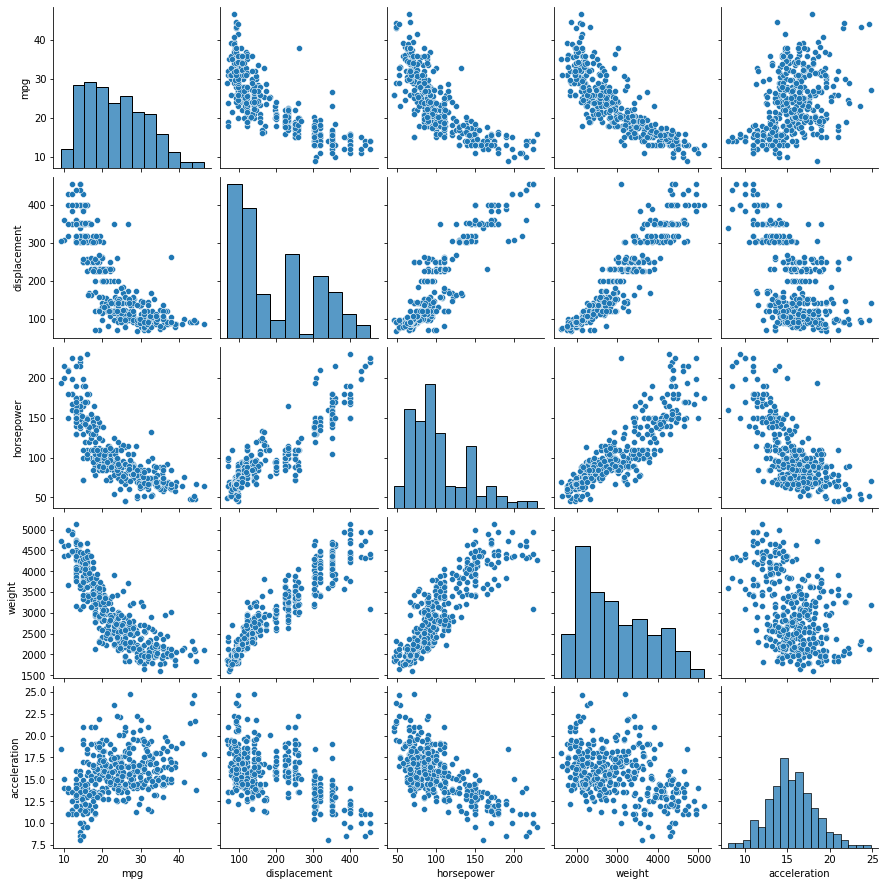

In [89]:
# Plot all the pairwise scatter plots and histograms for the numeric features.
sns.pairplot(auto, x_vars=['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], 
             y_vars=['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'])

## Q2. 2. Ans
**Discuss two interesting relationships that you notice.**



> 1. `Weight` and `displacement` have a strong positive linear connection. The data cluster more closely together in a linear pattern on the scatter plot of `weight` and `displacement`, indicating that they are significantly correlated with one another.
1. Due to the dispersed plots and difficulty determining their relationship, it appears that `acceleration` and `mpg` have a weak correlation.



## Q3. Compute the correlation matrix among the numeric variables. Discuss one interesting correlation. (5+5=**10 points total**)

In [90]:
# Check the pairwise correlation among the variables
auto[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].corr()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000


## Q3. Ans
**Discuss one interesting correlation.**



> The association between two variables is tighter as the correlation coefficient rises. The correlation r between `horsepower` and `displacement` is 0.897257, indicating a positive strong correlation between these two performance metrics.



## Q4. Use `statsmodels` to regress mpg on all other variables. Note you can tell `ols()` to treat a variable as categorical by enclosing the variable in `C()`. (10 points) **(15 points total)**
  1. Interpret the significant effects. (5 points)
  1. Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect. (5 points)
  1. Discuss the difference in results when you treat `year` as a categorical vs a numeric variable. (5 points)

In [91]:
# import statesmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Use ols model to access regression result summary table
est = smf.ols('mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + C(year) + C(origin)', auto).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          2.64e-151
Time:                        07:27:23   Log-Likelihood:                -954.59
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     369   BIC:                             2047.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.9168      2.36

In [92]:
# Treat year as numeric
est_num_year = smf.ols('mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + year + C(origin)', auto).fit()
print(est_num_year.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          2.39e-147
Time:                        07:27:23   Log-Likelihood:                -993.35
No. Observations:                 392   AIC:                             2011.
Df Residuals:                     380   BIC:                             2058.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -22.0801      4.54

## Q4. Ans
**1. Interpret the significant effects.**

> p-values between 0 and 1 are frequently used to represent the significant effects. The evidence that you should reject the null hypothesis is stronger the smaller the p-value. 

**2. Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect.**


> `Years 71 to 76` have p-values more than 0.05 for year; `displacement` and `acceleration` have p-values greater than 0.05 for numeric variables. Weak evidence is presented against the null hypothesis by the p-value above. Consequently, these numerical and categorical variables are **not statistically significant**. However, there is one surprsing p-value of `displacement`, since the correlation bewteen `displacement` and `mpg` is -0.805 and the p-value is more than 0.05. This indicates that `displacement` is associated with other variables whose p-value is less than 0.05. The correlation matrix in Q3 also demonstrated that, in comparison to the correlation with `mpg`(-0.80), `displacement` has a stronger correlation with `horsepower` and `weight`, which are respectively 0.89 and 0.93.



**3. Discuss the difference in results when you treat `year` as a categorical vs a numeric variable.**



> Treating `year` as categorical or numeric data results in distinct meanings. When `year` is treated as categorical data, it refers to the classification of a vehicle; when `year` is treated as numeric data, it refers to the search for the relationship between the age of the cars, which is interval data. As a result, categories `year` close to 70 have a low coefficient and a higher p-value than categories `year` close to 80. Additionally, when comparing the summary that treats `year` as categorical data to the summary that treats `year` as numeric data, some variables' p-values have changed.



## Q5. From the above regression model in Q4, include two way interactions between a numeric and categorical variable in three different regression models (three separate models in total). Do any of them appear significant? Discuss the results. **(15 points total)**


In [93]:
# Find the relationship between mpg and cylinders, and the relationship between mpg and cylinder * displacement
est1 = smf.ols('mpg ~ C(cylinders) + C(cylinders)*displacement', auto).fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     108.3
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           2.02e-99
Time:                        07:27:23   Log-Likelihood:                -1112.8
No. Observations:                 392   AIC:                             2246.
Df Residuals:                     382   BIC:                             2285.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## Q5. Ans
**Do any of them appear significant? Discuss the results.**


> The p-values are extremely large when attempting to determine the relationship between `mpg` and `cylinders`, as well as the relationship between `mpg` and `cylinders * displacement`, which provides evidence to accept the null hypothesis. Consequently, none of them are statistically significant. In addition, the p-values of cylinders and displacement in original summary table is much less than the p-values in this one. This may be due to the fact that cylinders are considerably more closely related to displacement than to mpg.



In [94]:
# Find the relationship between mpg and origin * horsepower
est2 = smf.ols('mpg ~ C(origin)*horsepower', auto).fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     166.4
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           5.39e-94
Time:                        07:27:23   Log-Likelihood:                -1135.9
No. Observations:                 392   AIC:                             2284.
Df Residuals:                     386   BIC:                             2308.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## Q5. Ans
**Do any of them appear significant? Discuss the results.**



> According to the result of ols model, all the p-values are 0.00. This indicates that the observed difference is unlikely to be due to chance. Thus, categorical variable `origin` and `horsepower` are statistically significant, and the interaction `C(origin)*horsepower` is also significant.



In [95]:
# Find the relationship between mpg and origin, the relationship between mpg 
# and origin * weight, and the relationship between mpg and origin * displacement.
est3 = smf.ols('mpg ~ C(origin) + C(origin)*weight + C(origin)*displacement', auto).fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     124.1
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.94e-101
Time:                        07:27:23   Log-Likelihood:                -1110.5
No. Observations:                 392   AIC:                             2239.
Df Residuals:                     383   BIC:                             2275.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## Q5. Ans
**Do any of them appear significant? Discuss the results.**


> According to the results of ols, all parameters associated with `origin = 2` have large p-values ( more than 0.05 ). It can be known that these data ( p-value > 0.05 ) do not appear significant, and other data are statistically significant. Thus, this situation may be caused by that only the classification, `origin = 2`, is not significant, resulting that all other parameters related to it have small p-values.



## Q6. Measure the in-sample and out of sample $R^2$ of the model estimated in Q4.1 using 20% data for testing. **(10 points total)**

In [96]:
# import train_test_split function to set training dataset and testing dataset
from sklearn.model_selection import train_test_split
D_train, D_test = train_test_split(auto, test_size = .20, random_state=0)  # Use 20% data for testing

# Print the in-sample and out of sample R-square
print('in-sample r-square: {:.2f}'.format(est.rsquared))
predictions = est.predict(D_test)  # automatically transforms the test data per the formula.
print('out-of-sample r-square: {:.2f}'.format(r2_score(D_test.mpg, predictions)))

in-sample r-square: 0.87
out-of-sample r-square: 0.89


## Q7. Collaboration statement **(10 points total)**
Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? 

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you. 

Sample answer: I discussed with Hazel for this homework. I needed her help with gradescope and as a sounding board for the reasonableness of this homework.

**Collaboration Statement:**


> I discussed with Yiping for this homework. We are not sure about whether the column `name` should be dropped or not and the column `year` should be treated as numeric variable or categorical variable.





